In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jobs_barbie = pd.read_csv('DATA/barbie_careers.csv')
jobs_real = pd.read_csv('DATA/employment_earnings.csv')

In [87]:
import seaborn as sns

# Define your custom pink color palette
custom_palette = [ '#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585', '#FFA07A', '#FF7F50', '#FF6347', '#FF4500', "#FFC0CB", "#FF69B4", "#FF1493", "#DB7093", "#C71585","#FEC5E5"]

# Set the custom palette as the default for Seaborn plots
sns.set_palette(custom_palette)
sns.set_style('whitegrid',  rc={'axes.labelcolor': "#C71585",    
        'xtick.color': "#DB7093",        
        'ytick.color': "#DB7093",
        'grid.color':'#FFC0CB',
        'axes.edgecolor':'#FFC0CB'
        })

<span style="color: #E0218A; font-size: 36px;">During this exploratory data analysis we are going to find out how women careers are represented both in Barbie world and in real life.</span>

In [59]:
jobs_barbie.tail()

,ID,Type,Career,Year
225,226,Sport,Cheerleader,1973.0
226,227,Sport,Cheerleader,2006.0
227,228,Sport,Cheerleader (Dallas Cowboys edition),2008.0
228,229,Sport,Golfer,2018.0
229,230,Sport,Boxer,2019.0


In [60]:
jobs_barbie.describe()

,ID,Year
count,230.000000,226.000000
mean,115.500000,1997.349558
std,66.539462,18.113149
min,1.000000,1959.000000
25%,58.250000,1985.250000
50%,115.500000,2000.500000
75%,172.750000,2012.000000
max,230.000000,2020.000000


In [61]:
jobs_barbie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      230 non-null    int64  
 1   Type    230 non-null    object 
 2   Career  230 non-null    object 
 3   Year    226 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.3+ KB


In [62]:
missing_years = jobs_barbie[jobs_barbie['Year'].isna()]
missing_years

,ID,Type,Career,Year
14,15,Education,Special education teacher,NaN
63,64,Science and engineering,Geologist,NaN
163,164,Arts,Photographer,NaN
190,191,Business,Banker,NaN


In [63]:
#Since only 4 years are missing we can look them up and add manually
#create dictionary of misssing barbies and years
career_year = {'Special education teacher' :2020, 'Geologist': 2021, 'Photographer': 2014, 'Banker': 2019} 

for key, value in career_year.items():
    jobs_barbie.loc[jobs_barbie['Career'] == key, 'Year'] = value

In [64]:
jobs_barbie.groupby('Type')['Type'].count()

Type
Arts                       22
Beauty                     67
Business                   25
Education                  23
Medicine                   11
Military                    8
Political                   9
Public Service              7
Science and engineering    12
Sport                      31
Transportation             15
Name: Type, dtype: int64

<span style="color: #E0218A; font-size: 30px;"> We can see from the graph below that majority professions represented in Barbies are from Beauty industry.</span>

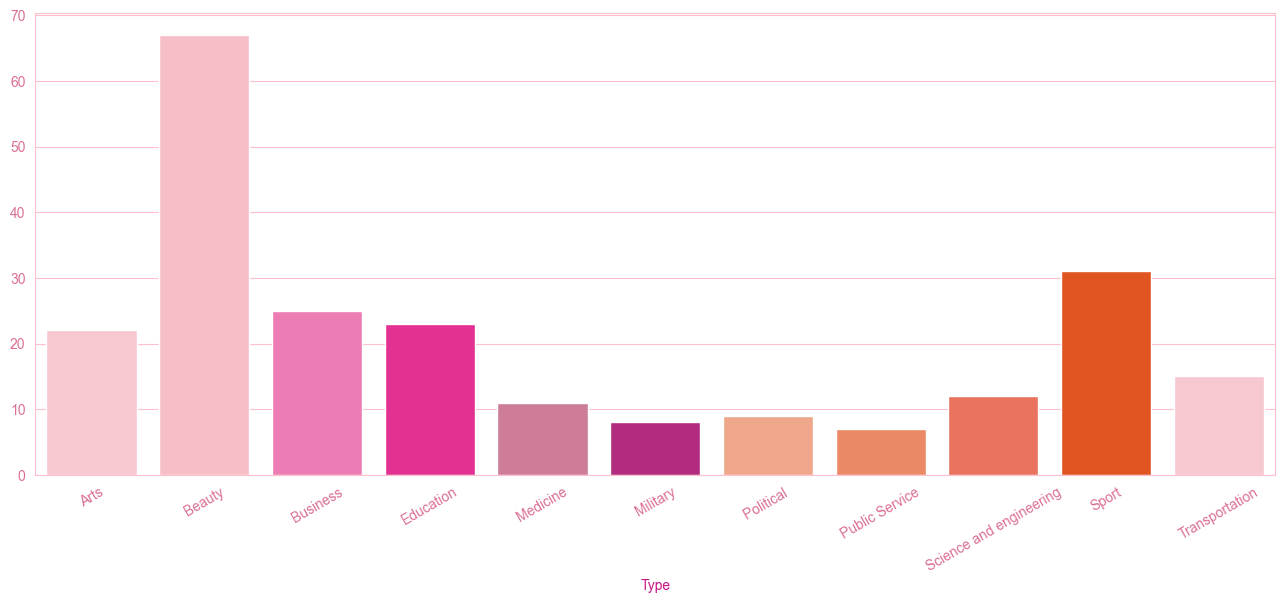

In [88]:

career_types = jobs_barbie.groupby('Type')['Type'].count()
fig, ax = plt.subplots(figsize=(16, 6))
plt.xticks(rotation = 30)
sns.barplot(x = career_types.index, y = career_types.values, palette=custom_palette);

<span style="color: #E0218A; font-size: 30px;">Now we are going to find out in what fields have the highest representations of  women in real life</span>

In [68]:
jobs_real.head()

,Occupation,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings
0,Accountants and auditors,"1,452,102","614,573","837,529",57.7,"75,713","84,537","69,691",82.4
1,Actuaries,"33,962","25,529","8,433",24.8,"129,791","135,774","124,509",91.7
2,Administrative services managers,"59,654","14,792","44,862",75.2,"70,082","85,238","65,351",76.7
3,Advertising and promotions managers,"57,735","27,035","30,700",53.2,"86,690","97,919","77,910",79.6
4,Advertising sales agents,"86,861","45,286","41,575",47.9,"67,398","68,208","66,313",97.2


In [71]:
jobs_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          338 non-null    object 
 1   Number of full-time workers                         338 non-null    object 
 2   Number of men                                       338 non-null    object 
 3   Number of women                                     338 non-null    object 
 4   Percentage of women in occupational group           338 non-null    float64
 5   Median earnings                                     338 non-null    object 
 6   Median earnings men                                 338 non-null    object 
 7   Median earnings women                               338 non-null    object 
 8   Women's earnings as a percentage of men's earnings  336 non-null    float64
dtype

In [70]:
top20_fields = jobs_real.nlargest(20, 'Percentage of women in occupational group')

In [72]:
top20_fields

,Occupation,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings
261,Preschool and kindergarten teachers,"476,797","11,561","465,236",97.6,"34,569","36,834","34,426",93.5
103,Executive secretaries and executive administra...,"233,339","13,167","220,172",94.4,"63,646","59,589","63,982",107.4
41,Childcare workers,"380,451","22,323","358,128",94.1,"25,365","26,729","25,241",94.4
295,"Secretaries and administrative assistants, exc...","1,541,391","110,655","1,430,736",92.8,"41,767","49,636","41,478",83.6
78,Dental assistants,"166,272","12,158","154,114",92.7,"35,349","40,485","35,092",86.7
188,Medical assistants,"434,436","37,180","397,256",91.4,"35,170","40,400","34,721",85.9
189,Medical records specialists,"167,694","16,243","151,451",90.3,"45,177","47,499","44,958",94.7
280,Receptionists and information clerks,"723,332","75,075","648,257",89.6,"32,397","39,724","32,109",80.8
137,"Hairdressers, hairstylists, and cosmetologists","286,507","30,220","256,287",89.5,"31,311","37,587","30,978",82.4
23,Billing and posting clerks,"361,880","42,995","318,885",88.1,"40,054","45,938","39,504",86.0


<span style="color: #E0218A; font-size: 30px;">As we see in the graph below fields, where majority of workers are women,related to childcare, various kinds of assistance,clerks and home aides</span>

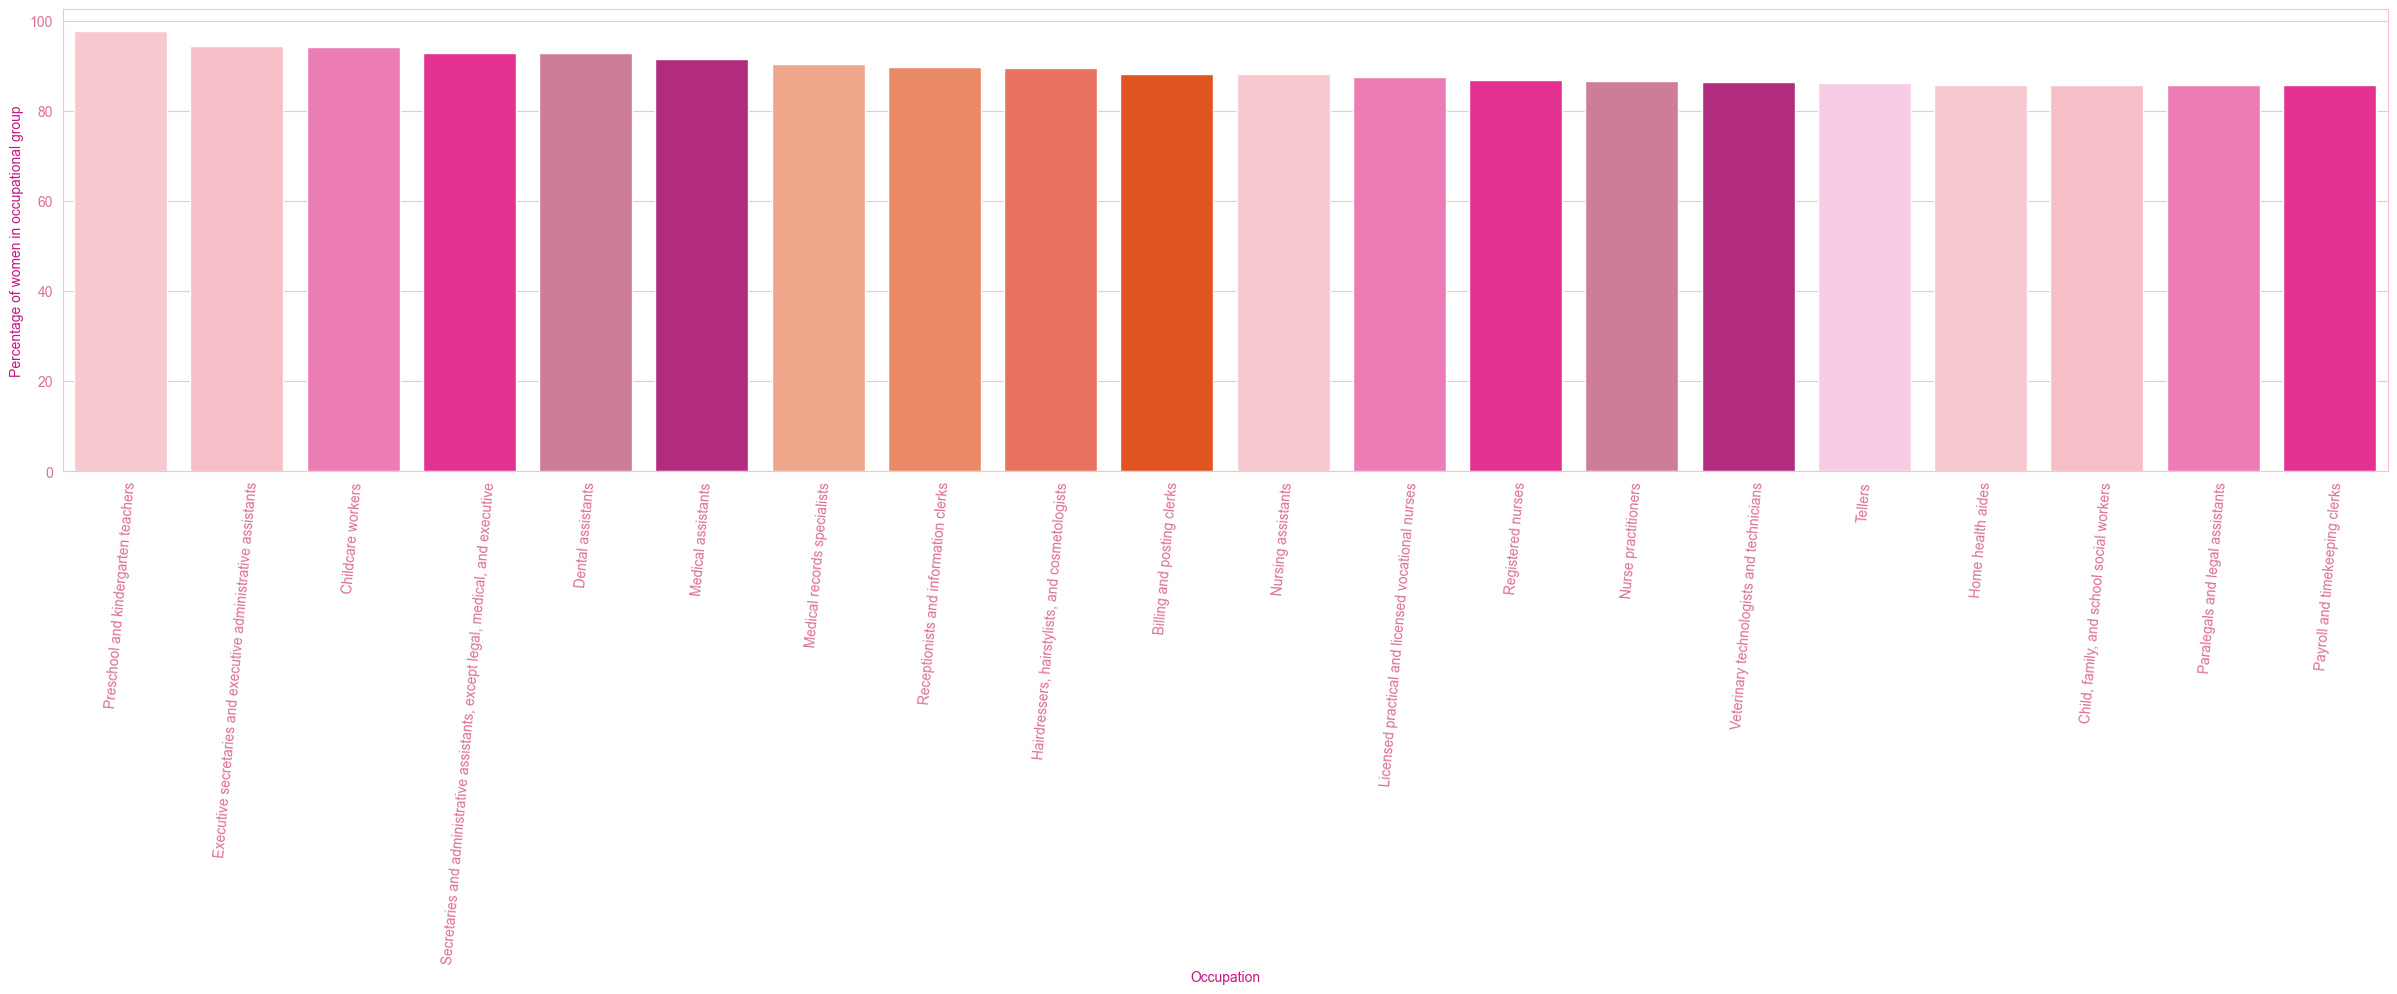

In [89]:
fig, ax = plt.subplots(figsize=(30, 6))
# Rotate the x-axis labels by 60 degrees
ax.tick_params(axis='x', rotation=85)

# Set a proper font size for the x-axis labels
ax.tick_params(axis='x', labelsize=10)

#plt.xticks(rotation=80)

sns.barplot(data = top20_fields, x = 'Occupation', y = 'Percentage of women in occupational group',palette=custom_palette);